In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [2]:
def plot(y):
    x_ = np.arange(1, len(y) + 1)  # Generate x-axis values as the range of iterations
    X_Y_Spline = make_interp_spline(x_, y)  # Use x_ as the x-axis values
    x_smooth = np.linspace(x_.min(), x_.max(), 100)  # Generate smooth x-axis values
    y_smooth = X_Y_Spline(x_smooth)  # Evaluate the spline at the smooth x-axis values
    plt.plot(x_smooth, y_smooth)
    plt.xlabel("No. of iteration")
    plt.ylabel("Cost")
    plt.show()

In [3]:
def normalise(x):
    means = np.mean(X_train, axis=0)
    dev = np.std(X_train, axis = 0)
    x = (x - means)/dev
    return x

[[ 1.26311506  1.33630621 -0.70710678  1.22474487]
 [-0.08073519 -0.26726124  1.41421356  0.        ]
 [-1.18237987 -1.06904497 -0.70710678 -1.22474487]]
w = [ 38.05161509  41.54327447 -30.98894586  36.34177456]
b = 289.99999091824986
Steps =  165


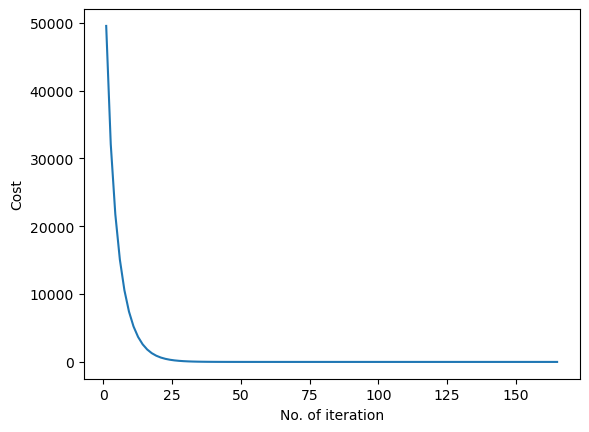

In [7]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

X_normal = normalise(X_train)
print(X_normal)

w = np.zeros(X_train[0].shape)
b = 0

m = len(X_train)
alpha = 0.1
cost = []

for i in range(1000):
    f_wb = np.dot(w, X_normal.T) + b
    cost.append(np.sum((f_wb - y_train)**2) / (2 * m))
    d_w = np.dot((f_wb - y_train), X_normal) / m
    d_b = np.sum((f_wb - y_train)) / m

    if np.sum(alpha * d_w) < 0.000001 and abs(alpha * d_b) < 0.000001:
        break

    w = w - alpha * d_w
    b = b - alpha * d_b

print("w =", w)
print("b =", b)
print("Steps = ", i+1)
plot(cost)

In [5]:
x_new = [[1416, 3, 2, 40]]
y_cap = np.dot(w, normalise(x_new).T) + b
print(y_cap)

[231.99999191]
